In [1]:
import pandas as pd
from sklearn import preprocessing

In [2]:
from seaborn import heatmap
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

palette = sns.color_palette("PiYG", as_cmap=True)
sns.set(rc={'text.usetex':False, 'font.family':'sans-serif','figure.facecolor':"white",'axes.facecolor':"white"})

In [3]:
idx  = 37 # index_can_be_processed_by_all

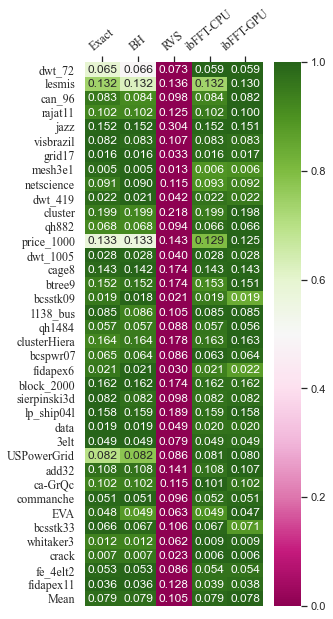

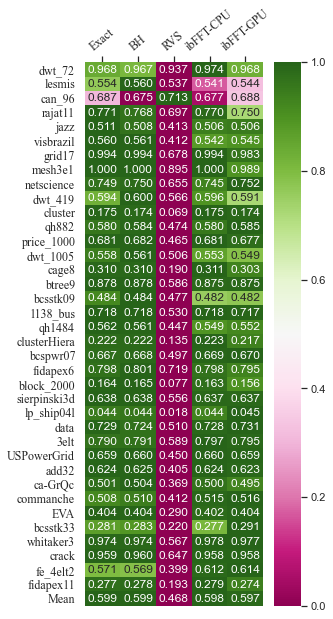

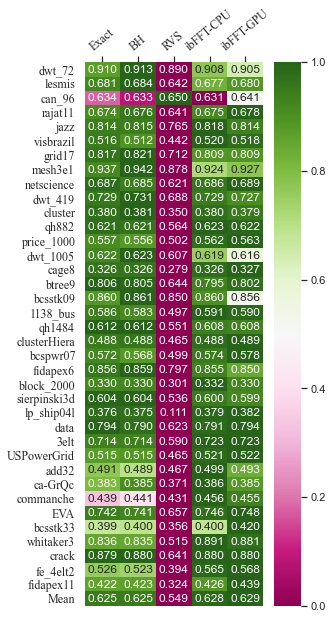

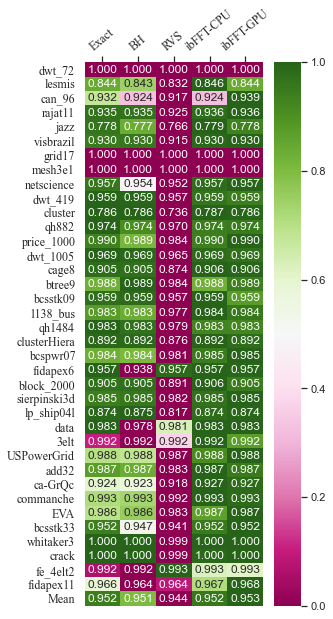

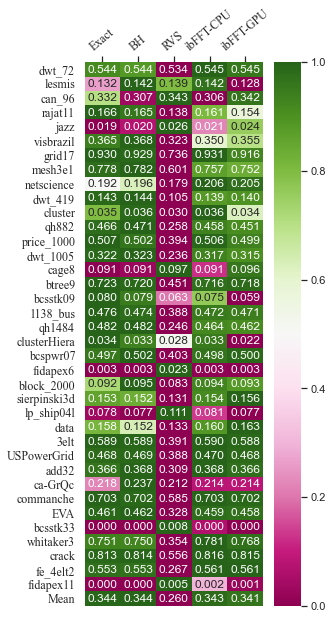

In [4]:
metrics = ["SE","NP1","NP2","EC","MA"]
for m in metrics:
    df = pd.read_csv("./results/Approx_" + m + ".csv",index_col=0)[["Exact","BH","RVS","ibFFT-CPU","ibFFT-GPU"]]
    df = df.rename(columns={"Exact":"Exact","BH":"BH","RVS":"RVS","FFTCPU":"ibFFT(CPU)","FFTGPU":"ibFFT(GPU)"})
    df = df[:idx]
    
    df.loc["Mean"] = df.mean()
    cm = df.applymap(lambda x:x)
    x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    if m == "SE":
        maxminnorm_df = pd.DataFrame(min_max_scaler.fit_transform(1 - df.T).T, columns=df.columns, index=df.index)
    else:
        maxminnorm_df = pd.DataFrame(min_max_scaler.fit_transform(df.T).T, columns=df.columns, index=df.index)
    
    plt.figure(figsize=(4,10))
    ax = heatmap(maxminnorm_df,annot=cm,fmt=".3f",cmap=palette,annot_kws={"size": 12})

    ax.xaxis.tick_top() 
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=40,fontsize=12,fontname="Times New Roman")
    plt.yticks(fontsize=12,fontname="Times New Roman")
    plt.savefig("./Figs/SuppFig3Heatmap_Approx/" + m + ".pdf")
    plt.show()